#过程：
#问题：
1. 
2. 
3. 

## 原始数据
## 数据清洗
## 数据分析
## 数据结论


准备工作

# 数据预处理

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#解决中文问题
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号问题
plt.rcParams['axes.unicode_minus'] = False

%matplotlib inline 
#直接显示生成图形

In [2]:
#原始数据
data1 = pd.read_csv('./data/detail.csv',parse_dates=[0],encoding='gbk')
data1.head()

ordernumber               ID  shouldpay  actualpay  \
0  DD2017071411375590DDC1B360AB7  E43A6E078A06874          3          3   
1  DD2017071412044099C079EF00FC6  E43A6E078A06874          3          3   
2  DD201707142332315732C4C7B4FB8  E43A6E078A06874          3          3   
3  DD2017081110181727A2E7134E07A  E43A6E078A04134          3          3   
4  DD2017081621573918C354FF467CD  E43A6E078A04134          3          3   

  commodity             date palce situation withdraw month  day hour  
0     怡宝纯净水  2017/1/29 11:14     E    已出货未退款      已提现    1月  29日  11时  
1     怡宝纯净水  2017/1/29 11:15     E    已出货未退款      已提现    1月  29日  11时  
2     怡宝纯净水  2017/1/30 16:28     E    已出货未退款      已提现    1月  30日  16时  
3     怡宝纯净水   2017/1/5 15:51     B    已出货未退款      已提现    1月   5日  15时  
4     怡宝纯净水   2017/1/8 20:15     B    已出货未退款      已提现    1月   8日  20时

In [3]:
data2 = pd.read_csv('./data/goods.csv',encoding='gbk')
data2.head()

commodity level one level two  quantity  pay
0            拿铁咖啡（统一）        饮料        咖啡         0    0
1  55g奥利奥迷你杯夹心小饼干杯装原味       非饮料      饼干糕点         0    0
2        48g好丽友薯愿香烤原味       非饮料      膨化食品         0    0
3         250ml统一麦香奶茶        饮料       茶饮料         0    0
4             和成天下（红）       非饮料        香烟         0    0

In [4]:
#数据清洗——删除不合理值
data1.drop([70679],inplace=True)
data1.tail()

ordernumber               ID  shouldpay  actualpay  \
70674   DD201708167493578896180983074  E43A6E078A06874          6          6   
70675   DD201708167493435360779627047  E43A6E078A06874          6          6   
70676   DD201708167493268724502281064  E43A6E078A06874          6          6   
70677   DD201708167493206381039261894  E43A6E078A06874          6          6   
70678  DD2017081674930159455941028144  E43A6E078A06874          6          6   

           commodity              date palce situation withdraw month  day  \
70674  268ml雀巢咖啡丝滑拿铁   2017/12/3 18:52     E    已出货未退款      已提现   12月   3日   
70675  268ml雀巢咖啡丝滑拿铁   2017/12/5 19:39     E    已出货未退款      已提现   12月   5日   
70676  268ml雀巢咖啡丝滑拿铁   2017/12/9 16:42     E    已出货未退款      已提现   12月   9日   
70677  268ml雀巢咖啡丝滑拿铁  2017/12/10 14:56     E    已出货未退款      已提现   12月  10日   
70678  268ml雀巢咖啡丝滑拿铁  2017/12/26 17:40     E    已出货未退款      已提现   12月  26日   

      hour  
70674  18时  
70675  19时  
70676  16时  
70677  14时  
70678  17时

In [5]:
#查看是否有缺失值
(data1.isnull()).sum()

ordernumber    0
ID             0
shouldpay      0
actualpay      0
commodity      0
date           0
palce          0
situation      0
withdraw       0
month          0
day            0
hour           0
dtype: int64

In [6]:
#删除缺失值
data1.dropna(subset=['date'],inplace=True)

In [7]:
#检查是否删除
(data1.isnull()).sum()

ordernumber    0
ID             0
shouldpay      0
actualpay      0
commodity      0
date           0
palce          0
situation      0
withdraw       0
month          0
day            0
hour           0
dtype: int64

In [8]:
#检查重复值
data1.duplicated().sum()

0

In [9]:
data1['date'] = pd.to_datetime(data1['date'])  #将支付时间转换成datetime日期型数据
data = data1.set_index('date',inplace=True)

In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70679 entries, 2017-01-29 11:14:00 to 2017-12-26 17:40:00
Data columns (total 11 columns):
ordernumber    70679 non-null object
ID             70679 non-null object
shouldpay      70679 non-null int64
actualpay      70679 non-null int64
commodity      70679 non-null object
palce          70679 non-null object
situation      70679 non-null object
withdraw       70679 non-null object
month          70679 non-null object
day            70679 non-null object
hour           70679 non-null object
dtypes: int64(2), object(9)
memory usage: 6.5+ MB


In [12]:
data1.sort_values('actualpay',ascending=False)
data1.head()

ordernumber               ID  \
date                                                                  
2017-01-29 11:14:00  DD2017071411375590DDC1B360AB7  E43A6E078A06874   
2017-01-29 11:15:00  DD2017071412044099C079EF00FC6  E43A6E078A06874   
2017-01-30 16:28:00  DD201707142332315732C4C7B4FB8  E43A6E078A06874   
2017-01-05 15:51:00  DD2017081110181727A2E7134E07A  E43A6E078A04134   
2017-01-08 20:15:00  DD2017081621573918C354FF467CD  E43A6E078A04134   

                     shouldpay  actualpay commodity palce situation withdraw  \
date                                                                           
2017-01-29 11:14:00          3          3     怡宝纯净水     E    已出货未退款      已提现   
2017-01-29 11:15:00          3          3     怡宝纯净水     E    已出货未退款      已提现   
2017-01-30 16:28:00          3          3     怡宝纯净水     E    已出货未退款      已提现   
2017-01-05 15:51:00          3          3     怡宝纯净水     B    已出货未退款      已提现   
2017-01-08 20:15:00          3          3     怡宝纯净水     B    已出货未退款      已提现   

                    month  day hour  
date                                 
2017-01-29 11:14:00    1月  29日  11时  
2017-01-29 11:15:00    1月  29日  11时  
2017-01-30 16:28:00    1月  30日  16时  
2017-01-05 15:51:00    1月   5日  15时  
2017-01-08 20:15:00    1月   8日  20时

# 数据分析

In [44]:
#描述性分析
data1.describe()

shouldpay     actualpay
count  70679.000000  70679.000000
mean       4.247457      4.247457
std        3.352626      3.352626
min        0.000000      0.000000
25%        3.000000      3.000000
50%        4.000000      4.000000
75%        5.000000      5.000000
max      125.000000    125.000000

In [45]:
data2.describe()

quantity           pay
count   315.000000    315.000000
mean    224.380952    911.209524
std     473.228996   1694.573599
min       0.000000      0.000000
25%      12.500000     59.000000
50%      66.000000    305.000000
75%     191.500000    898.500000
max    4964.000000  12564.000000

In [15]:
data1['actualpay'].plot(figsize=(30,15))
plt.tick_params(labelsize=30)
plt.grid()

折线图容易产生毛刺，可以换成散点图

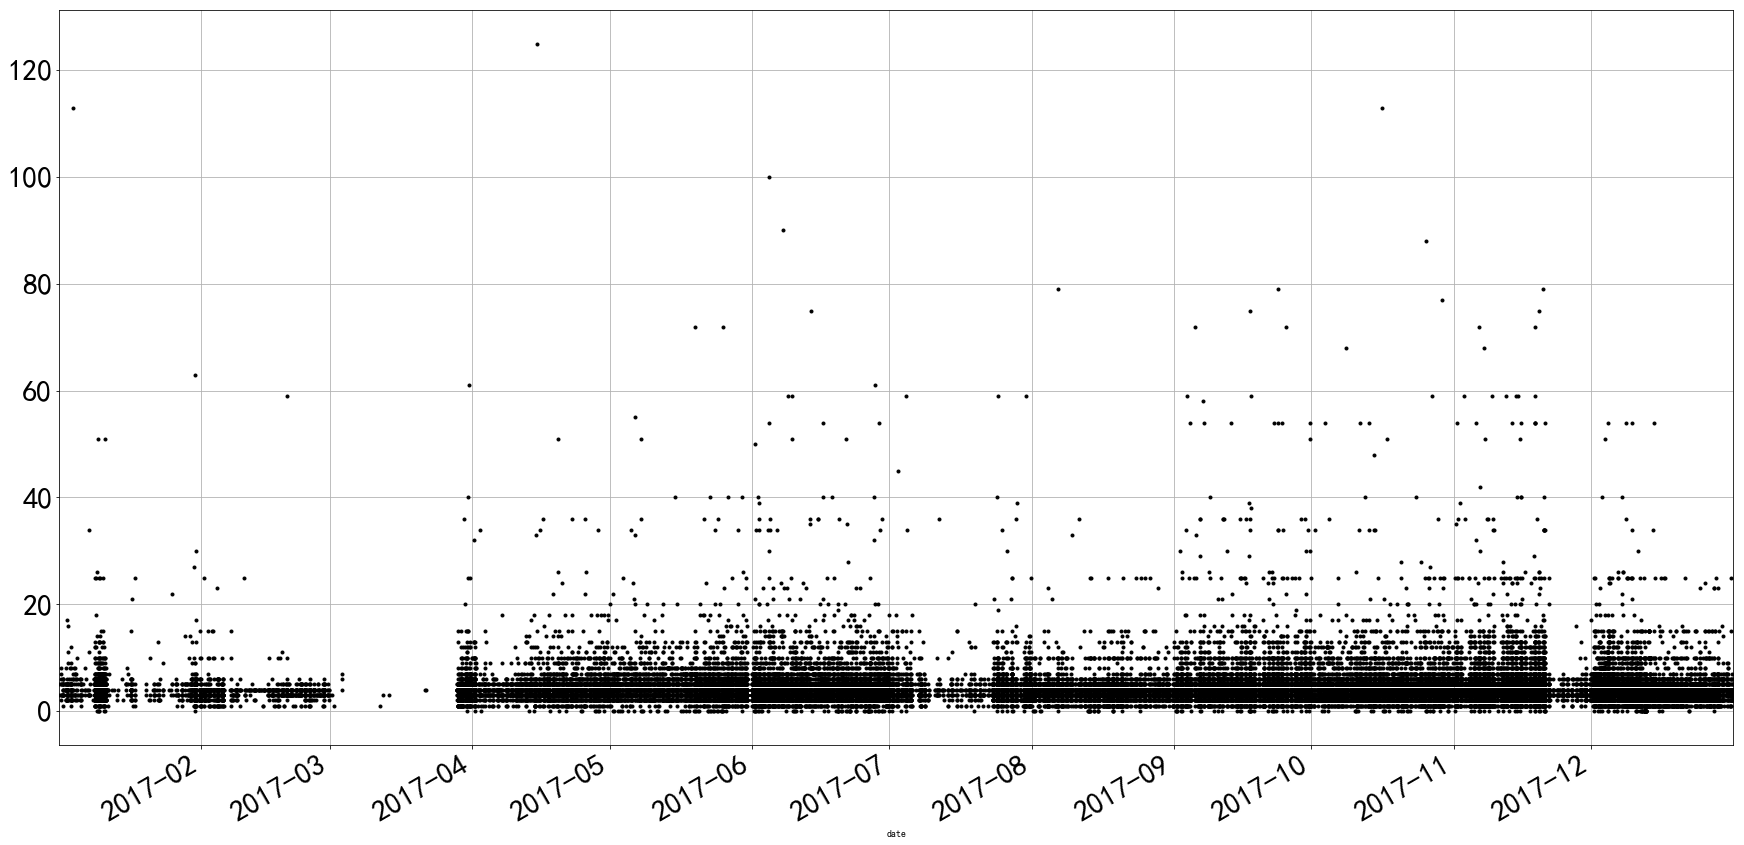

In [16]:
data1['actualpay'].plot(style='k.',figsize=(30,15))
plt.tick_params(labelsize=30)
plt.grid()


In [17]:
plt.style.use({'figure.figsize':(5,5)})

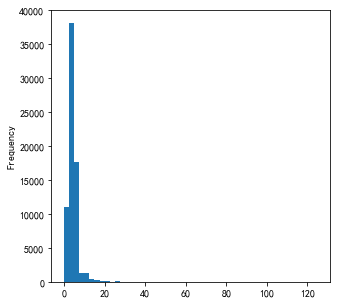

In [20]:
data1['actualpay'].plot(kind='hist',bins=50)

In [21]:
data1['actualpay'].plot(kind='kde')

In [4]:
data = pd.read_csv('./商品订单量.csv',encoding='gbk')
data.head()

商品   订单量   交易额
0       100g*5瓶益力多  204  3159
1      100g果王咸柑桔罐装   71   440
2   100g卫龙点心面黑椒牛排味   28   164
3  100g越南LIPO奶味面包干    2    16
4     103g康师傅红烧牛肉面   71   413

In [5]:
data.describe()

订单量          交易额
count   303.000000    303.00000
mean    233.267327    947.29703
std     480.379456   1717.95908
min       1.000000      0.00000
25%      16.000000     70.00000
50%      71.000000    332.00000
75%     211.000000    999.00000
max    4964.000000  12564.00000

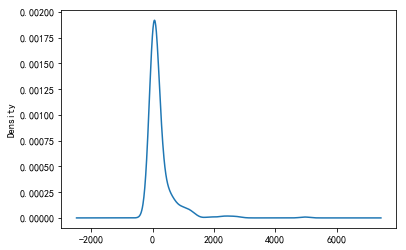

In [6]:
#订单量概率密度图
data["订单量"].plot(kind='kde')

In [46]:
#交易额概率概率图
data["交易额"].plot(kind='kde')

## 数据可视化
bins = [0,2,3,4,8,10,12,24,48,130]
pd.cut(data1.actualpay,bins).value_counts()

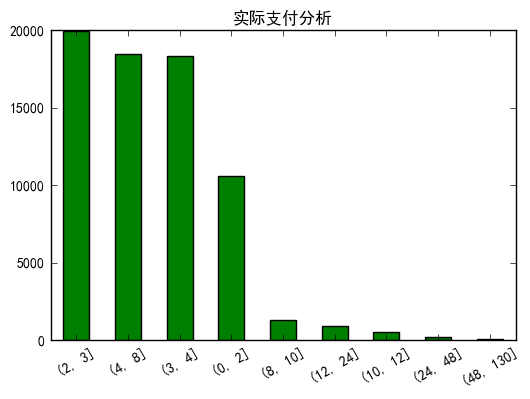

In [16]:
pd.cut(data1.actualpay,bins).value_counts().plot.bar(rot=30,color='green',title='实际支付分析')

商品分析

In [26]:
data1.commodity.value_counts()[:5]

怡宝纯净水    4964
脉动       2778
东鹏特饮     2581
阿萨姆奶茶    2396
营养快线     2239
Name: commodity, dtype: int64

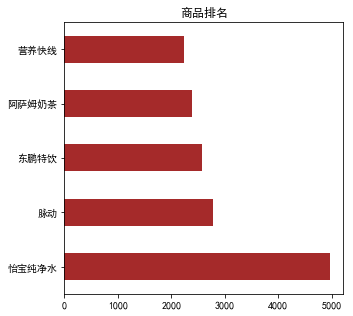

In [30]:
data1.commodity.value_counts()[:5].plot.barh(color='brown',title='商品排名')

In [20]:
data1.groupby(['palce'])['actualpay'].mean()

palce
A    4.057086
B    4.003138
C    4.248127
D    3.815368
E    4.069577
Name: actualpay, dtype: float64

In [21]:
data1.groupby(['palce'])['ordernumber'].count()

palce
A    10486
B    13482
C    14493
D     8713
E    23505
Name: ordernumber, dtype: int64

In [27]:
data1.groupby(['month'])['actualpay'].mean()

month
10月    4.168475
11月    4.443946
12月    4.060485
1月     4.398701
2月     3.724862
3月     4.106415
4月     4.318065
5月     4.642389
6月     4.286836
7月     4.255617
8月     3.832220
9月     4.356681
Name: actualpay, dtype: float64

In [28]:
number = data1.groupby(['month'])['ordernumber'].count()
print(number)

month
10月     9770
11月    11364
12月    11507
1月      1693
2月       905
3月      1325
4月      3122
5月      4270
6月      9040
7月      2715
8月      5388
9月      9580
Name: ordernumber, dtype: int64


In [24]:
la = data1.groupby(['palce','month'])['actualpay'].sum()
print(la)

palce  month
A      10月       6292.4
       11月       5187.0
       12月       7587.1
       1月        1509.7
       2月         440.5
       3月         914.3
       4月        1804.5
       5月        3385.1
       6月        6755.1
       7月        1950.5
       8月        2236.9
       9月        4479.5
B      10月       8331.6
       11月       8669.9
       12月       8104.1
       1月        1373.6
       2月         602.3
       3月         957.9
       4月        2457.4
       5月        3681.2
       6月        7550.3
       7月        1518.6
       8月        3516.1
       9月        7207.3
C      10月       9469.7
       11月       8456.7
       12月       9380.5
       1月        1640.5
       2月         792.0
       3月         991.5
       4月        3232.3
       5月        3729.4
       6月        8472.2
       7月        3047.1
       8月        4927.2
       9月        7429.0
D      10月       4606.7
       11月       4673.4
       12月       5941.2
       1月         956.4
       2月         435.5
   

In [96]:
data1.groupby(['month'])['actualpay'].mean()

month
10月    4.168475
11月    4.443946
12月    4.060485
1月     4.398701
2月     3.724862
3月     4.106415
4月     4.318065
5月     4.642389
6月     4.286836
7月     4.255617
8月     3.832220
9月     4.356681
月      4.000000
Name: actualpay, dtype: float64

In [97]:
data1.head()

ordernumber               ID  shouldpay  actualpay  \
0  DD2017071411375590DDC1B360AB7  E43A6E078A06874          3          3   
1  DD2017071412044099C079EF00FC6  E43A6E078A06874          3          3   
2  DD201707142332315732C4C7B4FB8  E43A6E078A06874          3          3   
3  DD2017081110181727A2E7134E07A  E43A6E078A04134          3          3   
4  DD2017081621573918C354FF467CD  E43A6E078A04134          3          3   

  commodity             date palce situation withdraw month  day hour  
0     怡宝纯净水  2017/1/29 11:14     E    已出货未退款      已提现    1月  29日  11时  
1     怡宝纯净水  2017/1/29 11:15     E    已出货未退款      已提现    1月  29日  11时  
2     怡宝纯净水  2017/1/30 16:28     E    已出货未退款      已提现    1月  30日  16时  
3     怡宝纯净水   2017/1/5 15:51     B    已出货未退款      已提现    1月   5日  15时  
4     怡宝纯净水   2017/1/8 20:15     B    已出货未退款      已提现    1月   8日  20时

In [33]:
data1.groupby(['palce','commodity'])['commodity'].count()

palce  commodity          
A      100g*5瓶益力多              40
       100g卫龙点心面黑椒牛排味           6
       100g果王咸柑桔罐装             20
       100g越南LIPO奶味面包干          1
       103g康师傅红烧牛肉面            15
       107g出前一丁桶面酱香牛肉王         12
       10g卫龙亲嘴烧香辣味             25
       10g越南LIPO奶味面包干           5
       10g越南LIPO奶味面包干0015       4
       10g越南LIPO奶味面包干0046       2
       110g顺宝九制话梅              41
       117gUFO炒面铁板色拉鱿鱼风味        5
       120g达利园蔓越莓提子面包           1
       123gUFO炒面XO酱海鲜风味         2
       12g劲仔小鱼卤香味              20
       12g劲仔小鱼麻辣味             103
       130g果王玉带蚕豆               5
       13g无穷烤鸡小腿蜂蜜味           201
       13g雀巢咖啡1+2特浓             4
       145g果王迷你山楂包装             4
       145ml旺仔牛奶盒装            131
       145ml旺仔牛奶罐装              2
       148g富甲一方紫薯仔             39
       14g德芙巧克力                 2
       150g健能酸奶原味              28
       150g洽洽原香瓜子              11
       150抽诗竹竹纤维面巾纸             9
       160g盼盼手撕面包              28
       180g统一满汉全席台式半筋

In [34]:
top5 = ["怡宝纯净水","脉动","东鹏特饮","阿萨姆奶茶","营养快线"]

In [35]:
data1_top5 = data1[data1['commodity'].isin(top5)]
#形状
data1_top5.shape

(14958, 11)

In [36]:
print('Top5商品占总商品比例：%.2f%%'%(data1_top5.shape[0]/data1.shape[0]*100))

Top5商品占总商品比例：21.16%


In [1079]:
data1_top5['commodity'].value_counts()

怡宝纯净水    4964
脉动       2778
东鹏特饮     2581
阿萨姆奶茶    2396
营养快线     2239
Name: commodity, dtype: int64

In [37]:
plt.axes(aspect='equal') #将横轴，纵轴坐标标准化处理，保证饼图是一个正圆，否则为椭圆
plt.pie(data1_top5['commodity'].value_counts(),explode=[0.05,0.05,0,0,0],startangle=0,labels=top5,autopct='%.2f%%',radius=1)

([<matplotlib.patches.Wedge at 0x1a180116cc0>,
 [Text(0.579596,0.993262,'怡宝纯净水'),
  Text(-1.02375,0.523875,'脉动'),
  Text(-0.873988,-0.667941,'东鹏特饮'),
  Text(0.139397,-1.09113,'阿萨姆奶茶'),
  Text(0.9806,-0.498422,'营养快线')],
 [Text(0.327598,0.561409,'33.19%'),
  Text(-0.578639,0.296103,'18.57%'),
  Text(-0.476721,-0.364331,'17.25%'),
  Text(0.0760349,-0.595163,'16.02%'),
  Text(0.534872,-0.271867,'14.97%')])

直方图

In [182]:
a = data2['pay']

C:\Users\15217\Anaconda3\lib\site-packages\numpy\lib\function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
C:\Users\15217\Anaconda3\lib\site-packages\numpy\lib\function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


TypeError: 'numpy.float64' object cannot be interpreted as an integer

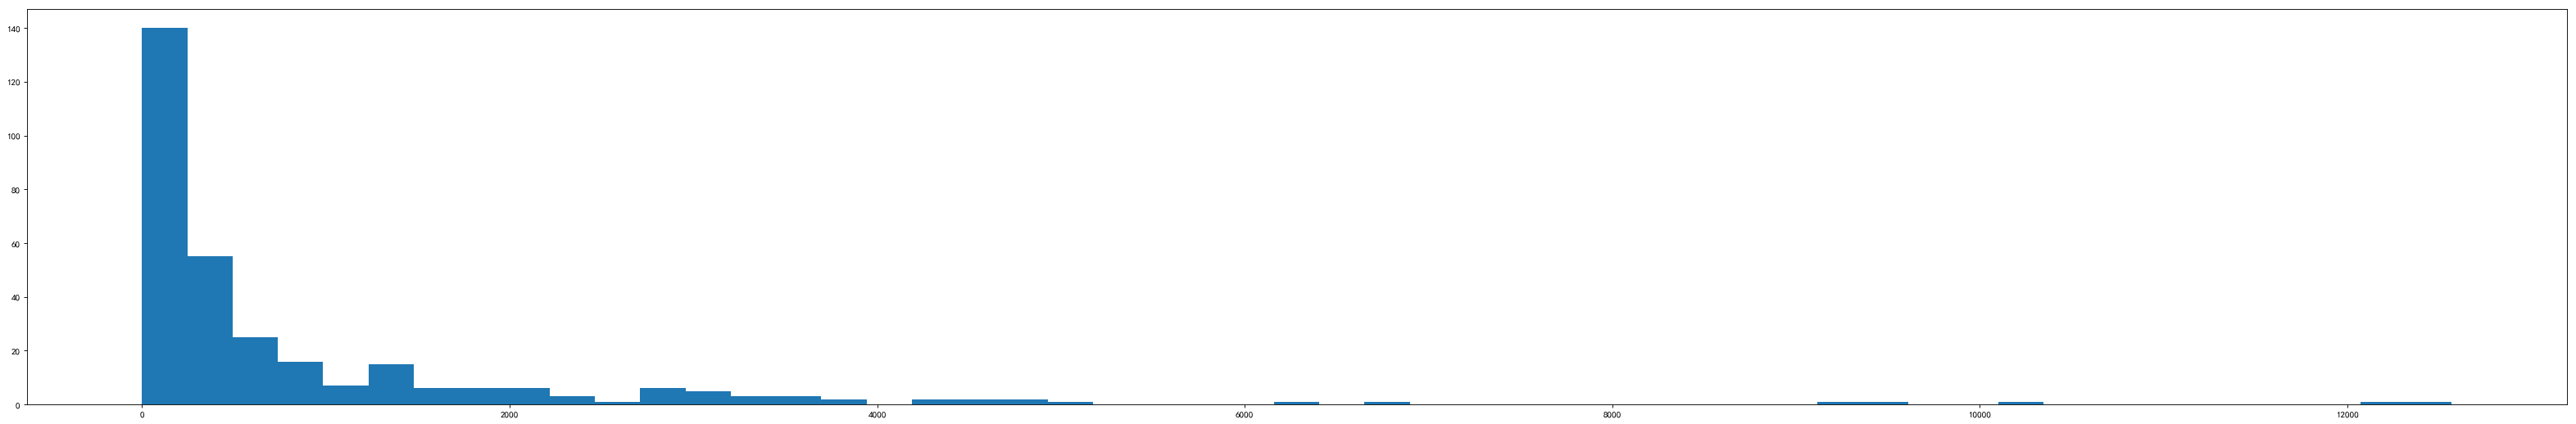

In [187]:
d = 248.2#组距
num_bins = (max(a)-min(a))//d +1

#设置图形的大小
plt.figure(figsize=(50,8),dpi=80)
#plt.hist(a,10,normed=1,histtype='stepfilled',facecolor='b',alpha=0.5)
plt.hist(a,num_bins)

plt.xticks(range(min(a),max(a)+d,d))
plt.grid()
plt.show()

柱状图

In [11]:
data3 = pd.read_csv('./6月商品排名前五.csv',parse_dates=[0],encoding='gbk')
data3.head()

商品  订单量
0       怡宝纯净水  657
1  40g双汇玉米热狗肠  240
2        东鹏特饮  238
3          脉动  235
4  250ml维他柠檬茶  225

In [12]:
da = data3.set_index("商品",inplace=True)

In [13]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 怡宝纯净水 to 250ml维他柠檬茶
Data columns (total 1 columns):
订单量    5 non-null int64
dtypes: int64(1)
memory usage: 80.0+ bytes


In [14]:
data3.plot.bar(rot=5,color='c',title='6月订单量前5商品')

折线图

In [1086]:
data4 = pd.read_csv('./售货机各月份交易总额.csv',encoding='gbk')
data4.head()

月份    A    B    C    D     E
0  1月  335  366  380  259   354
1  2月  114  185  207  141   258
2  3月  255  265  263  192   350
3  4月  447  603  734  443   895
4  5月  756  869  789  564  1292

In [1057]:
data4.plot(title='售货机各月份交易总额')
plt.xlabel('月份')## 添加横轴标签
plt.ylabel('交易总额')## 添加y轴名称